In [63]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob

In [158]:
def sampleSlice(i,mu,cov,x):
    mean = mu[i]
    var = cov[0][0]
    x[i] = mu[i] + np.random.standard_normal()*np.sqrt(var)
    return x

def createImage(x):
    img = np.zeros((30,30))
    for i in range(30):
        for j in range(30):
            img[i,j] = x[pix2num(i,j)]
    return img

In [159]:
mu = np.zeros(900)
for i in range(30):
    for j in range(30):
        mu[30*i+j] = (i+j)/100

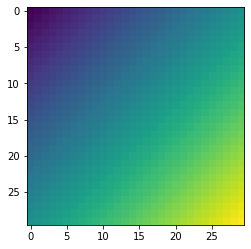

In [160]:
plt.imshow(createImage(mu))

In [161]:
cov = 0.1*np.eye(900)

In [162]:
# Gibbs sampling algorithm

imgs = []
sample = 0.5*np.ones(900)
for t in range(40):
    for i in range(900):
        sample = sampleSlice(i,mu,cov,sample)
    if (t+1)%10 == 0:
        img = createImage(sample)
        imgs.append(img)

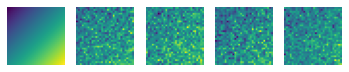

In [163]:
fig, axs = plt.subplots(1,5)
axs[0].imshow(createImage(mu))
axs[0].axis('off')
for i in range(4):
    axs[i+1].imshow(imgs[i])
    axs[i+1].axis('off')
plt.show()

In [164]:
# Observing sample at 10th iteration for 4 different images

img_list = glob.glob("./"+"*.png")
diff_imgs = []
gen_imgs = []
for file in img_list:
    imgs = np.asarray(Image.open(file).resize((30,30)).convert('L'))/255
    diff_imgs.append(imgs)
    
    # Gibbs sampling algorithm
    
    sample = 0.5*np.ones(900)
    for t in range(10):
        for i in range(900):
            sample = sampleSlice(i,imgs.reshape(-1),cov,sample)
        if (t+1)%10 == 0:
            img = createImage(sample)
            gen_imgs.append(img)

<Figure size 320x40 with 0 Axes>

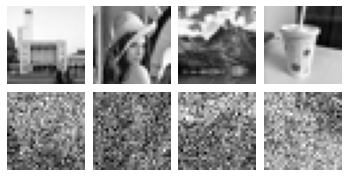

In [190]:
plt.figure(figsize=(8, 1), dpi=40)
fig, axs = plt.subplots(2,4)
plt.subplots_adjust(wspace=0.1, 
                    hspace=-0.35)
for i in range(4):
    axs[0,i].imshow(diff_imgs[i], cmap='gray')
    axs[0,i].axis('off')
for i in range(4):
    axs[1,i].imshow(gen_imgs[i], cmap='gray')
    axs[1,i].axis('off')
plt.show()

In [166]:
img0 = mu.reshape((30,30))
img1 = np.asarray(Image.open('./lenna.png').resize((30,30)).convert('L'))/255
img_arr = [[img0],[img1]]

In [176]:
# Observing sample at the 10th iteration for 2 different images and 4 different covariances

lamdas = [0.1,0.01,0.0025,1e-4]
for idx,imag in enumerate([img0,img1]):
    
    # Gibbs sampling algorithm
    for lamda in lamdas:
        nmu = imag.reshape(-1)
        ncov = lamda*np.eye(900)
        sample = 0.5*np.ones(900)
        for t in range(10):
            x = 0
            for i in range(900):
                sample = sampleSlice(i,nmu,ncov,sample)
            if (t+1)%10 == 0:
                img = createImage(sample)
                img_arr[idx].append(img)

<Figure size 320x40 with 0 Axes>

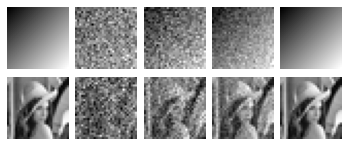

In [185]:
plt.figure(figsize=(8, 1), dpi=40)
fig, axs = plt.subplots(2,5)
plt.subplots_adjust(wspace=0.1, 
                    hspace=-0.525)
for i in range(5):
    axs[0,i].imshow(img_arr[0][i], cmap='gray')
    axs[0,i].axis('off')
for i in range(5):
    axs[1,i].imshow(img_arr[1][i], cmap='gray')
    axs[1,i].axis('off')
plt.show()